# Pokemon Analysis
---
### I will be exploring the Pokemon dataset from [Kaggle](http://www.kaggle.com).
The dataset was downloaded from https://www.kaggle.com/abcsds/pokemon. 



In [1]:
%pylab inline

import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

random.seed(1234)
sns.set(font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


### Next, load the csv file into a DataFrame and look at the first few lines.

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Here are some variable descriptions from the Kaggle website:

|Variable|Description|
|:-:|:--|
|**#**|ID for each pokemon|
|**Name**|Name of each pokemon|
|**Type 1**|Each pokemon has a type, this determines weakness/resistance to attacks|
|**Type 2**|Some pokemon are dual type and have 2|
|**Total**|sum of all stats that come after this, a general guide to how strong a pokemon is|
|**HP**|hit points, or health, defines how much damage a pokemon can withstand before fainting|
|**Attack**|the base modifier for normal attacks (eg. Scratch, Punch)|
|**Defense**|the base damage resistance against normal attacks|
|**SP. Atk**|special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)|
|**SP. Def**|the base damage resistance against special attacks|
|**Speed**|determines which pokemon attacks first each round|
|**Generation**|the number of the generation a pokemon belongs to
|**Legendary**|boolean value indicating if a pokemon is Legendary (True) or not Legendary (False)|

Notice that there are multiple entries for Pokemon \#3 (Venusaur). We won't be able to set `#` as the index since it contains duplicates.

We can also modify the column names to get rid of periods and spaces. The column names should also be lowercased for use with SQLite.

In [3]:
# Lowercase and replace periods & spaces in the column names
new_names = []

for col in df.columns:
    new_names.append(col.replace('.', '', len(col)).replace(' ', '', len(col)).lower())

df.columns = new_names

print(df.columns)

Index(['#', 'name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense',
       'spatk', 'spdef', 'speed', 'generation', 'legendary'],
      dtype='object')


In [4]:
df['legendary'] = df['legendary'].apply(lambda x: 1 if x == True else 0)
df.head()


,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


### Next, load the data into SQL

First we'll need to create a database, then create a table in our new database.

In [5]:
# Create pokemon table in pokemon database (only run this once!)
engine = create_engine('sqlite:///pokemon.db')
conn = engine.connect()
df.to_sql('pokemon', conn)

ValueError: Table 'pokemon' already exists.

In [6]:
%load_ext sql

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
%sql sqlite://

'Connected: None@None'

In [8]:
%sql sqlite:///pokemon.db

'Connected: None@pokemon.db'

In [9]:
%%sql
SELECT * FROM pokemon LIMIT 3;

Done.


index,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0


# SQL:
Most useful Pokemon (largest Total value)?

In [10]:
%%sql
SELECT max(total),name, hp, attack, defense, speed FROM pokemon;

Done.


max(total),name,hp,attack,defense,speed
780,MewtwoMega Mewtwo X,106,190,100,130


MewtwoMega Mewtwo X seems to be the most powerful Pokemon based upon having the largest total value.

# SQL: 
### Mean attack, defense, hp, and total for each type of pokemon?


In [11]:
%%sql
SELECT AVG(attack) as average_attack, AVG(defense) as average_defense, AVG(hp) as average_hp, 
AVG(total) as average_total, type1
FROM pokemon
GROUP BY type1
ORDER BY average_total DESC;

Done.


average_attack,average_defense,average_hp,average_total,type1
112.125,86.375,83.3125,550.53125,Dragon
92.70370370370371,126.37037037037037,65.22222222222223,487.7037037037037,Steel
78.75,66.25,70.75,485.0,Flying
71.45614035087719,67.6842105263158,70.63157894736842,475.94736842105266,Psychic
84.76923076923077,67.76923076923077,69.90384615384616,458.0769230769231,Fire
92.86363636363636,100.79545454545455,65.36363636363636,453.75,Rock
88.38709677419355,70.2258064516129,66.80645161290323,445.741935483871,Dark
69.0909090909091,66.29545454545455,59.79545454545455,443.40909090909093,Electric
73.78125,81.1875,64.4375,439.5625,Ghost
95.75,84.84375,73.78125,437.5,Ground


# Distinct Pokemon that are Legendary (distinct means unique Pokemon #).

In [12]:
import pandas as pd
from pandas import DataFrame as df


In [13]:
pokemon_df = pd.read_sql('pokemon',conn)

In [14]:
print(type(pokemon_df))

<class 'pandas.core.frame.DataFrame'>


In [15]:
pokemon_df.dtypes.index

Index(['index', '#', 'name', 'type1', 'type2', 'total', 'hp', 'attack',
       'defense', 'spatk', 'spdef', 'speed', 'generation', 'legendary'],
      dtype='object')

In [16]:
pokemon_df.head()

,index,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0


In [17]:
pokemon_df['pokemon_number'] = pokemon_df['#']  

In [18]:
#Number of unique Pokemon that are legendary
unique_and_legendary =  pokemon_df.drop_duplicates(['pokemon_number'])
unique_and_legendary = unique_and_legendary[unique_and_legendary.legendary==1]
unique_lengendary = unique_and_legendary.legendary.count()
unique_lengendary
#max(pokemon_df.pokemon_number)

46

In [19]:
unique_lengendary/max(pokemon_df.pokemon_number)

0.063800277392510402

About 6.4% of unique pokemon are legendary. 

# Barplots of a categorical variables

In [20]:
import seaborn as sns
#from seaborn import barplot

#barplot('brand', 'price', data=laptops);

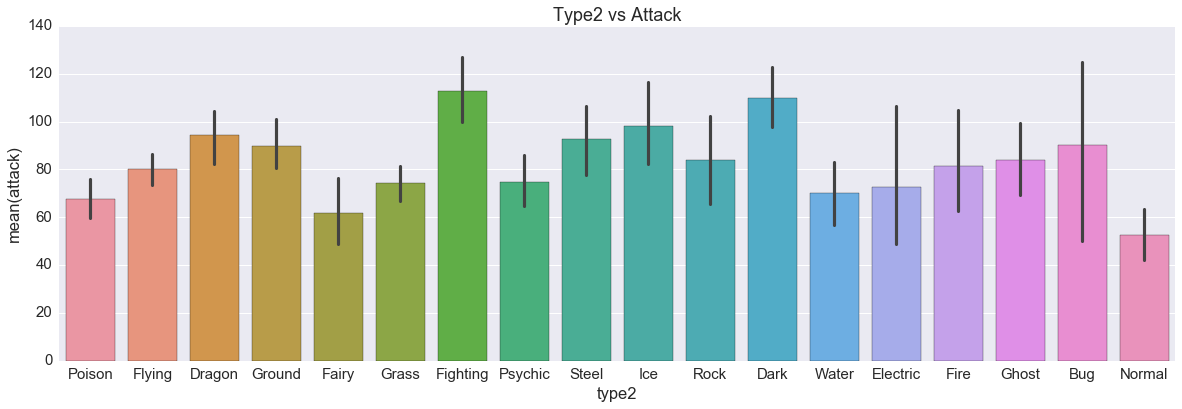

In [21]:
plt.figure(figsize=([20,6]))
sns.barplot(x=pokemon_df.type2, y= pokemon_df.attack)
plt.title('Type2 vs Attack');

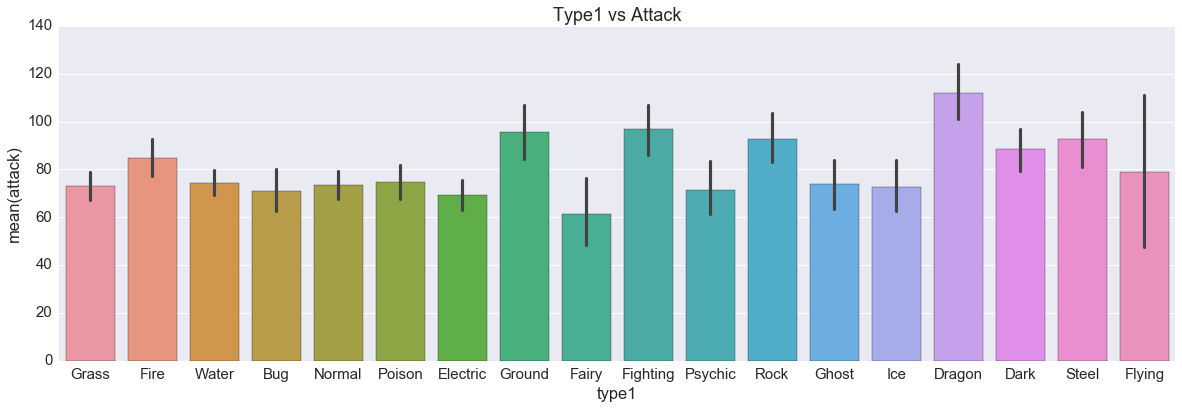

In [22]:
plt.figure(figsize=([20,6]))
sns.barplot(x=pokemon_df.type1, y= pokemon_df.attack)
plt.title('Type1 vs Attack');


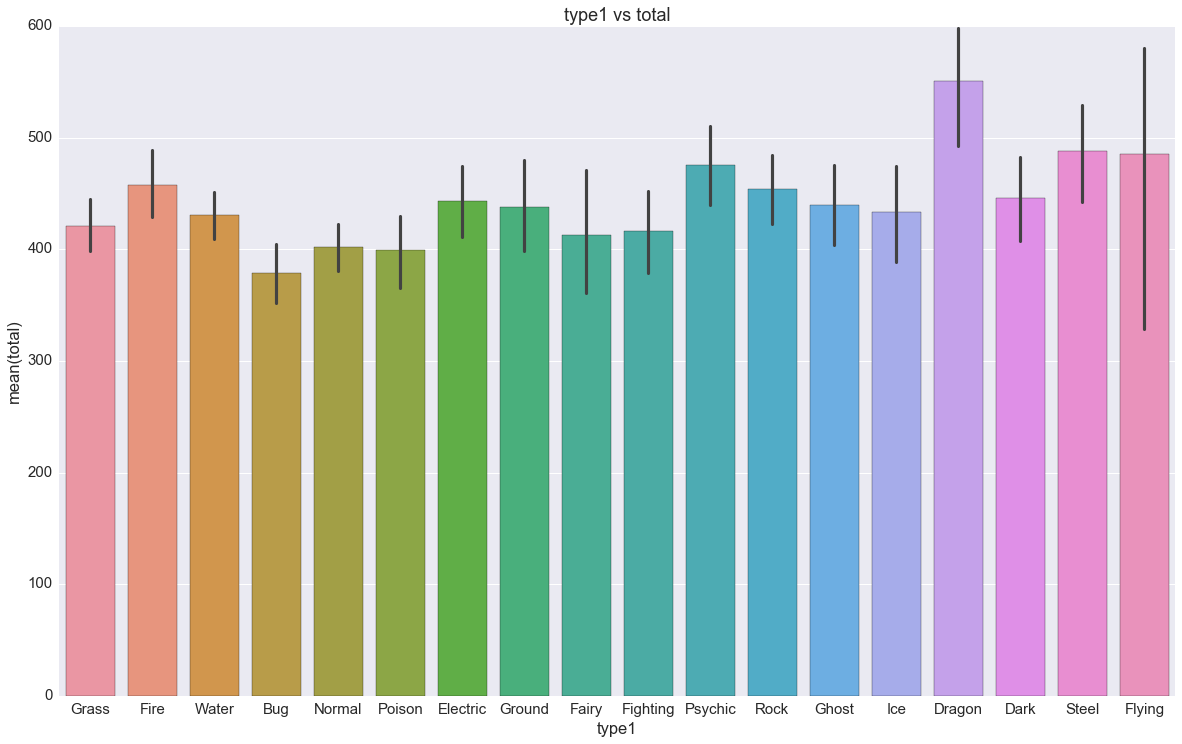

In [23]:
plt.figure(figsize=([20,12]))
sns.barplot(x=pokemon_df.type1, y= pokemon_df.total)
plt.title('type1 vs total');

# Boxplots of continuous variables

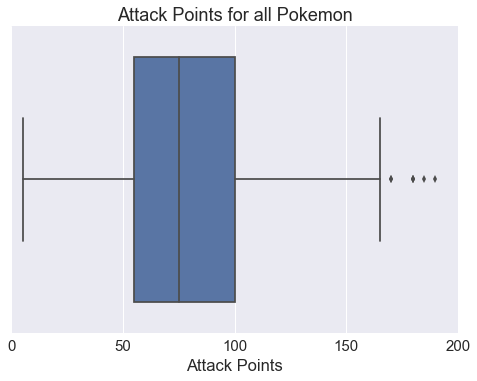

In [24]:

sns.boxplot(x=pokemon_df.attack )
plt.xlabel('Attack Points')
plt.title('Attack Points for all Pokemon');

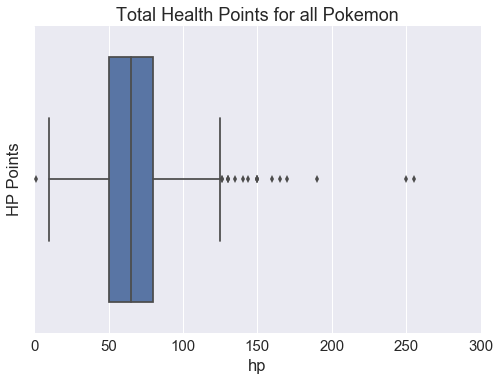

In [25]:

sns.boxplot(x=pokemon_df.hp)
plt.ylabel('HP Points')
plt.title('Total Health Points for all Pokemon');

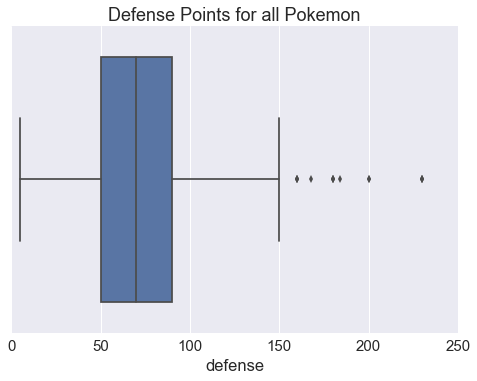

In [26]:
sns.boxplot(x=pokemon_df.defense)
plt.title('Defense Points for all Pokemon');


# Boxplots of continuous variables grouped by a categorical variables

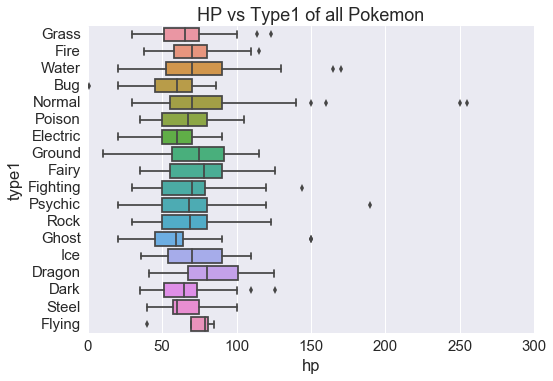

In [27]:

sns.boxplot(x=pokemon_df.hp , y=pokemon_df.type1)
plt.title('HP vs Type1 of all Pokemon');

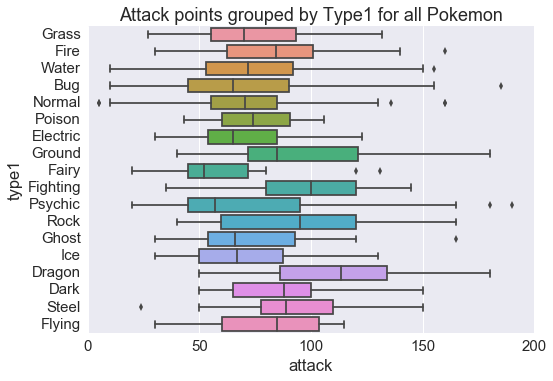

In [28]:

sns.boxplot(x=pokemon_df.attack , y=pokemon_df.type1)
plt.title('Attack points grouped by Type1 for all Pokemon');

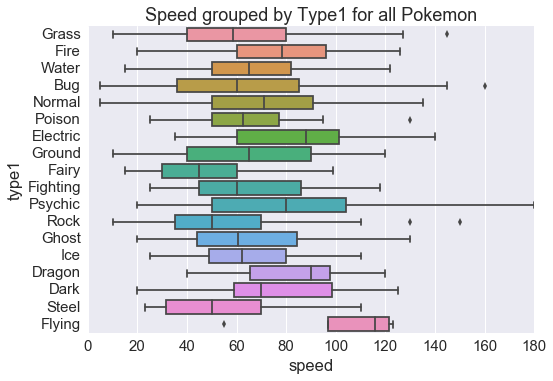

In [29]:

sns.boxplot(x=pokemon_df.speed , y=pokemon_df.type1)
plt.title('Speed grouped by Type1 for all Pokemon');

# Mean and standard deviation of the total column for each Pokemon Type 1.


In [30]:
type1_grouped = pokemon_df.groupby('type1')['total'].describe()

In [31]:
type1_grouped

type1          
Bug       count     69.000000
          mean     378.927536
          std      117.875223
          min      194.000000
          25%      269.000000
          50%      395.000000
          75%      475.000000
          max      600.000000
Dark      count     31.000000
          mean     445.741935
          std      109.126217
          min      220.000000
          25%      359.000000
          50%      465.000000
          75%      510.000000
          max      680.000000
Dragon    count     32.000000
          mean     550.531250
          std      146.267538
          min      300.000000
          25%      420.000000
          50%      600.000000
          75%      680.000000
          max      780.000000
Electric  count     44.000000
          mean     443.409091
          std      105.721952
          min      205.000000
          25%      362.250000
          50%      477.500000
                      ...    
Psychic   std      139.026645
          min      198.0

In [32]:
pokemon_df.attack.describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: attack, dtype: float64

In [33]:
pokemon_df.hp.describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: hp, dtype: float64

In [34]:
pokemon_df.speed.describe()

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: speed, dtype: float64

## Random  sample of 100:
#### 1) Compare sample statistics & population statistics for Attack points.


In [35]:
pokemon_df.head()


,index,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary,pokemon_number
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,1
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,2
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,3
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,3
4,4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0,4


In [36]:
## sample
hundred_sample_df= pokemon_df.sample(100)


hundred_sample_df.attack.describe()

count    100.000000
mean      80.660000
std       32.694552
min       10.000000
25%       55.750000
50%       80.000000
75%      100.000000
max      180.000000
Name: attack, dtype: float64

In [37]:
##population

pokemon_df.attack.describe()


count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: attack, dtype: float64

Comparing the attack of our sample to our population, the mean is slightly lower (74.37 vs 79), and the STD is also lower due to fewer extreme values. There are also differences is the max and min attack points of our sample vs population due to the nature of random sampling (we might have missed these extreme values in our sampling).

# Histograms of the Attack points sample & Attack points population.


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


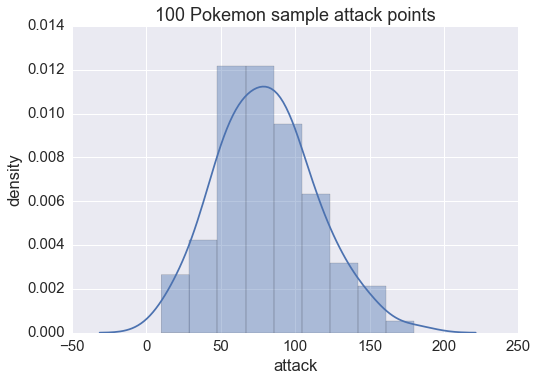

In [38]:
sns.distplot(hundred_sample_df.attack,norm_hist = True);
ylabel('density')
plt.title('100 Pokemon sample attack points');

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


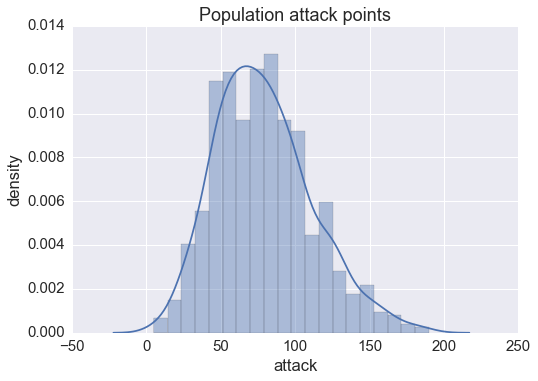

In [39]:
sns.distplot(pokemon_df.attack,norm_hist=True)
ylabel('density')
plt.title('Population attack points');

- In comparing out histogram between the population for attack points and our sample, our sample appears to be much more normally distributed than our population which has a long tail to the right.

# Sample statistics vs. population statistics for at least one other continuous variable.


In [40]:
hundred_sample_df.total.describe() 

count    100.000000
mean     447.620000
std      113.555645
min      194.000000
25%      358.000000
50%      452.500000
75%      511.250000
max      780.000000
Name: total, dtype: float64

In [41]:
pokemon_df.total.describe()

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: total, dtype: float64

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


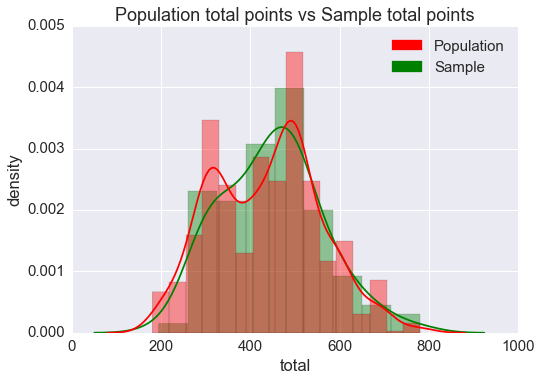

In [42]:
import matplotlib.patches as mpatches
sns.distplot(hundred_sample_df.total, color='green',norm_hist=True)
sns.distplot(pokemon_df.total, color = 'red',norm_hist=True)
red_patch = mpatches.Patch(color='red', label='Population')
green_patch = mpatches.Patch(color='green', label='Sample')
plt.legend(handles = [red_patch,green_patch])
ylabel('density')
plt.title('Population total points vs Sample total points');

In comparing the statistics of the sample and population for total points, the standard deviation for the slightly larger than the standard deviation of the population (due to the chance of sampling Pokemon that lie one the ends of our distribution). However, The IQR ranges are smaller because even though we have extreme values, we have less present than in the population.

Also, the binomial distribution of total points for Pokemon is more pronouned in the population than in the sample - due to more data points.

# Histograms of the Attack points sample & at least one other continuous variable in the population.

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


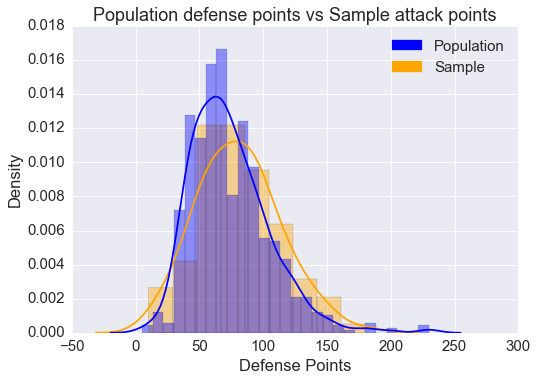

In [43]:
sns.distplot(hundred_sample_df.attack, color='orange',norm_hist=True)
sns.distplot(pokemon_df.defense, color = 'blue',norm_hist=True)
red_patch = mpatches.Patch(color='blue', label='Population')
green_patch = mpatches.Patch(color='orange', label='Sample')
plt.legend(handles = [red_patch,green_patch])
ylabel('Density')
xlabel('Defense Points')
plt.title('Population defense points vs Sample attack points');

# Probability: Assume you are a Pokemaster and have caught every Pokemon. You pick 6 Pokemon at random to carry.
### What's the probability that they are all Water type? (probability of a Pokemon with Type 1 or Type 2 of Water)


In [44]:
pokemon_df.type1.describe()

count       800
unique       18
top       Water
freq        112
Name: type1, dtype: object

In [45]:
pokemon_df.groupby(pokemon_df.type1).count()

,index,#,name,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary,pokemon_number
type1,,,,,,,,,,,,,,
Bug,69,69,69,52,69,69,69,69,69,69,69,69,69,69
Dark,31,31,31,21,31,31,31,31,31,31,31,31,31,31
Dragon,32,32,32,21,32,32,32,32,32,32,32,32,32,32
Electric,44,44,44,17,44,44,44,44,44,44,44,44,44,44
Fairy,17,17,17,2,17,17,17,17,17,17,17,17,17,17
Fighting,27,27,27,7,27,27,27,27,27,27,27,27,27,27
Fire,52,52,52,24,52,52,52,52,52,52,52,52,52,52
Flying,4,4,4,2,4,4,4,4,4,4,4,4,4,4
Ghost,32,32,32,22,32,32,32,32,32,32,32,32,32,32


In [46]:
pokemon_df.type2.describe()

count        414
unique        18
top       Flying
freq          97
Name: type2, dtype: object

In [47]:
pokemon_df.groupby(pokemon_df.type2).count()

,index,#,name,type1,total,hp,attack,defense,spatk,spdef,speed,generation,legendary,pokemon_number
type2,,,,,,,,,,,,,,
Bug,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Dark,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Dragon,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Electric,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Fairy,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Fighting,26,26,26,26,26,26,26,26,26,26,26,26,26,26
Fire,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Flying,97,97,97,97,97,97,97,97,97,97,97,97,97,97
Ghost,14,14,14,14,14,14,14,14,14,14,14,14,14,14


In [48]:
pokemon_df.loc[pokemon_df.type2=="Water"]

,index,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary,pokemon_number
149,149,138,Omanyte,Rock,Water,355,35,40,100,90,55,35,1,0,138
150,150,139,Omastar,Rock,Water,495,70,60,125,115,70,55,1,0,139
151,151,140,Kabuto,Rock,Water,355,30,80,90,55,45,55,1,0,140
152,152,141,Kabutops,Rock,Water,495,60,115,105,65,70,80,1,0,141
307,307,283,Surskit,Bug,Water,269,40,30,32,50,52,65,3,0,283
398,398,363,Spheal,Ice,Water,290,70,40,50,55,50,25,3,0,363
399,399,364,Sealeo,Ice,Water,410,90,60,70,75,70,45,3,0,364
400,400,365,Walrein,Ice,Water,530,110,80,90,95,90,65,3,0,365
445,445,400,Bibarel,Normal,Water,410,79,85,60,55,60,71,4,0,400
533,533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,0,479


P( Type1 Water OR Type2 Water) =  P(Type1 Water) + P(Type2 Water) - P(Type1 Water AND Type 2 Water)

P(Type 1 Water) = 112/800
- There are  112 water types out of 800 total pokemon

P(Type 2 Water) = 14/800

- There are 14 water types for type 2 out of 800 pokemon

P( Type 1 Water AND Type 2 Water) =  0 

- There are no Pokemon that have their type1 as water and their type 2 as water.

**Total P(Type1 Water OR Type2 Water) = 116 / 800 or 14.5%**

We will be sampling without replacement, so we will use the following formula.

$116/800 * 115/799 * 114/798 * 113/797 * 112/796 * 111/795$ = 

In [1]:
(116/800)*(115/799)*(114/798)*(113/797)*(112/796)*(111/795)

8.304279355839966e-06

 # Come up with at least one more scenario for your set of six Pokemon and compute the probability of getting it.

#### Given that your Pokemon is Dragon (for type1), what is the probability that is it a legendary Pokemon?

P( Legendary | Dragon) = P( Lengendary AND Dragon) / P( Dragon)

P( Lengendary AND Dragon) = 12 / 800

P (Dragon) = 32/ 800

P( Lengendary AND Dragon) / P( Dragon) = 12/800  / 32/800 = .015 / .04 = **37.5%**

In [49]:
dragon_type_1 =pokemon_df.type1=='Dragon'
legendary_pokemon = pokemon_df.legendary==1

pokemon_df[dragon_type_1 & legendary_pokemon].count()



index             12
#                 12
name              12
type1             12
type2             12
total             12
hp                12
attack            12
defense           12
spatk             12
spdef             12
speed             12
generation        12
legendary         12
pokemon_number    12
dtype: int64

In [50]:
#dragon_type_1 = pokemon_df.type1=='Dragon'

pokemon_df[pokemon_df.type1=='Dragon'].count()

index             32
#                 32
name              32
type1             32
type2             21
total             32
hp                32
attack            32
defense           32
spatk             32
spdef             32
speed             32
generation        32
legendary         32
pokemon_number    32
dtype: int64

In [51]:
pokemon_df.head()

,index,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary,pokemon_number
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,1
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,2
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,3
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,3
4,4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0,4


### What is the probability that your attack points are over 100 given that you are a Grass type1 Pokemon?

P( attack > 100 | Grass) = P (attack > 100 AND Grass) / P(Grass)

P (attack > 100 AND Grass) = 9 / 800
P( Grass) = 70/800

= 9/800   / 70/800  = **12.86%**

In [52]:
grass_type_pokemon = pokemon_df.type1=='Grass'
attack_greater_100 = pokemon_df.attack>100

In [53]:
pokemon_df[grass_type_pokemon & attack_greater_100].count()

index             9
#                 9
name              9
type1             9
type2             8
total             9
hp                9
attack            9
defense           9
spatk             9
spdef             9
speed             9
generation        9
legendary         9
pokemon_number    9
dtype: int64

In [54]:
pokemon_df[grass_type_pokemon].count()

index             70
#                 70
name              70
type1             70
type2             37
total             70
hp                70
attack            70
defense           70
spatk             70
spdef             70
speed             70
generation        70
legendary         70
pokemon_number    70
dtype: int64

# What is the probability that your defense is greater than your HP?

In [55]:
pokemon_df[pokemon_df.defense>pokemon_df.hp].count()

index             345
#                 345
name              345
type1             345
type2             195
total             345
hp                345
attack            345
defense           345
spatk             345
spdef             345
speed             345
generation        345
legendary         345
pokemon_number    345
dtype: int64

345/800 or **43.13%**

### I hope you found this analysis interesting and useful for your quest ot become a Pokemon master!